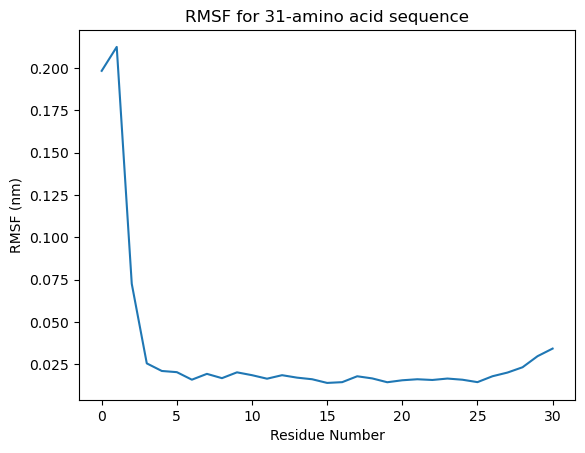

In [4]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# 定义所有PDB文件的路径列表
pdb_files = [
    'test_5c7bb_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_001.pdb',
    'test_5c7bb_unrelaxed_rank_002_alphafold2_ptm_model_4_seed_000.pdb',
    'test_5c7bb_unrelaxed_rank_003_alphafold2_ptm_model_4_seed_005.pdb',
    'test_5c7bb_unrelaxed_rank_004_alphafold2_ptm_model_4_seed_003.pdb',
    'test_5c7bb_unrelaxed_rank_005_alphafold2_ptm_model_4_seed_002.pdb',
    'test_5c7bb_unrelaxed_rank_006_alphafold2_ptm_model_4_seed_006.pdb',
    'test_5c7bb_unrelaxed_rank_007_alphafold2_ptm_model_3_seed_005.pdb',
    'test_5c7bb_unrelaxed_rank_008_alphafold2_ptm_model_3_seed_003.pdb',
    'test_5c7bb_unrelaxed_rank_009_alphafold2_ptm_model_4_seed_004.pdb',
    'test_5c7bb_unrelaxed_rank_010_alphafold2_ptm_model_1_seed_000.pdb',
    'test_5c7bb_unrelaxed_rank_011_alphafold2_ptm_model_3_seed_001.pdb',
    'test_5c7bb_unrelaxed_rank_012_alphafold2_ptm_model_3_seed_006.pdb',
    'test_5c7bb_unrelaxed_rank_013_alphafold2_ptm_model_3_seed_002.pdb',
    'test_5c7bb_unrelaxed_rank_014_alphafold2_ptm_model_4_seed_007.pdb',
    'test_5c7bb_unrelaxed_rank_015_alphafold2_ptm_model_2_seed_000.pdb',
    'test_5c7bb_unrelaxed_rank_016_alphafold2_ptm_model_3_seed_004.pdb',
    'test_5c7bb_unrelaxed_rank_017_alphafold2_ptm_model_1_seed_002.pdb',
    'test_5c7bb_unrelaxed_rank_018_alphafold2_ptm_model_3_seed_007.pdb',
    'test_5c7bb_unrelaxed_rank_019_alphafold2_ptm_model_1_seed_001.pdb',
    'test_5c7bb_unrelaxed_rank_020_alphafold2_ptm_model_2_seed_001.pdb',
    'test_5c7bb_unrelaxed_rank_021_alphafold2_ptm_model_3_seed_000.pdb',
    'test_5c7bb_unrelaxed_rank_022_alphafold2_ptm_model_1_seed_006.pdb',
    'test_5c7bb_unrelaxed_rank_023_alphafold2_ptm_model_1_seed_004.pdb',
    'test_5c7bb_unrelaxed_rank_024_alphafold2_ptm_model_1_seed_007.pdb',
    'test_5c7bb_unrelaxed_rank_025_alphafold2_ptm_model_1_seed_005.pdb',
    'test_5c7bb_unrelaxed_rank_026_alphafold2_ptm_model_2_seed_006.pdb',
    'test_5c7bb_unrelaxed_rank_027_alphafold2_ptm_model_2_seed_003.pdb',
    'test_5c7bb_unrelaxed_rank_028_alphafold2_ptm_model_2_seed_005.pdb',
    'test_5c7bb_unrelaxed_rank_029_alphafold2_ptm_model_5_seed_006.pdb',
    'test_5c7bb_unrelaxed_rank_030_alphafold2_ptm_model_5_seed_001.pdb',
    'test_5c7bb_unrelaxed_rank_031_alphafold2_ptm_model_2_seed_004.pdb',
    'test_5c7bb_unrelaxed_rank_032_alphafold2_ptm_model_5_seed_000.pdb',
    'test_5c7bb_unrelaxed_rank_033_alphafold2_ptm_model_2_seed_007.pdb',
    'test_5c7bb_unrelaxed_rank_034_alphafold2_ptm_model_5_seed_005.pdb',
    'test_5c7bb_unrelaxed_rank_035_alphafold2_ptm_model_5_seed_003.pdb',
    'test_5c7bb_unrelaxed_rank_036_alphafold2_ptm_model_5_seed_007.pdb',
    'test_5c7bb_unrelaxed_rank_037_alphafold2_ptm_model_5_seed_002.pdb',
    'test_5c7bb_unrelaxed_rank_038_alphafold2_ptm_model_2_seed_002.pdb',
    'test_5c7bb_unrelaxed_rank_039_alphafold2_ptm_model_5_seed_004.pdb',
    'test_5c7bb_unrelaxed_rank_040_alphafold2_ptm_model_1_seed_003.pdb'
]

# 加载所有PDB文件
trajectories = [md.load(pdb) for pdb in pdb_files]

# 使用第一个PDB文件作为参考结构
reference = trajectories[0]

# 将所有PDB文件的结构叠加到参考结构上
for traj in trajectories:
    traj.superpose(reference)

# 计算RMSF
# 首先合并所有轨迹，以便对它们的坐标进行统一处理
merged_traj = trajectories[0]
for traj in trajectories[1:]:
    merged_traj = merged_traj.join(traj)

# 计算每个残基的RMSF
rmsf_values = md.rmsf(merged_traj, reference, atom_indices=reference.topology.select('name CA'))

# 获取残基编号（只获取 CA 原子的残基）
residue_ids = [atom.residue.index for atom in reference.topology.atoms if atom.name == 'CA']

# 绘制 RMSF vs 残基编号的图表
plt.plot(residue_ids, rmsf_values)
plt.xlabel('Residue Number')
plt.ylabel('RMSF (nm)')
plt.title('RMSF for 31-amino acid sequence')
plt.show()